
# Immo Eliza Data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the json file into a pandas DataFrame.

raw_immo_df = pd.read_json('final_dataset.json')


## 1. Initial exploration


We first display the head of the DataFrame.

In [3]:
raw_immo_df.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,...,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for...,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,...,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,...,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for...,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,...,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment...,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale



We are also interested by the shape of the DataFrame.

In [4]:
f"The DataFrame has {raw_immo_df.shape[0]} rows and {raw_immo_df.shape[1]} columns."

'The DataFrame has 118714 rows and 32 columns.'



Are there any duplicates in the DataFrame?

In [5]:
# Check if there are duplicates
raw_immo_df.duplicated().sum()

np.int64(0)


There are no duplicates. Let us print a concise summary of the DataFrame.

In [6]:
raw_immo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118714 entries, 2 to 181792
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea         22503 non-null   float64
 11  Kitchen            67134 non-null   object 
 12  LivingArea         104539 non-null  float64
 13  Locality           118712 non-null  object 
 14  MonthlyCharges     13650 non-null   float64
 15  NumberOfFacades    76942 non-null   float64
 16  PEB    


## 2. Data validation


Some columns have the wrong type. Let's fix that.

In [7]:
# Changing the type of some columns
dictionary_types = {'Url': 'string', 'BathroomCount': 'Int64', 'BedroomCount': 'Int64', 'ConstructionYear': 'Int64', 'Country': 'string',
    'District': 'string', 'Fireplace': 'boolean', 'FloodingZone': 'category', 'Furnished': 'boolean', 'Garden': 'boolean',
    'GardenArea': 'Int64', 'Kitchen': 'category', 'LivingArea': 'Int64', 'Locality': 'string', 'MonthlyCharges': 'Float64',
    'NumberOfFacades': 'Int64', 'PEB': 'category', 'PostalCode': 'string', 'Price': 'Float64', 'PropertyId': 'string',
    'Province': 'string', 'Region': 'string', 'RoomCount': 'Int64', 'ShowerCount': 'Int64', 'StateOfBuilding': 'category',
    'SubtypeOfProperty': 'category', 'SurfaceOfPlot': 'Int64', 'SwimmingPool': 'boolean', 'Terrace': 'boolean',
    'ToiletCount': 'Int64', 'TypeOfProperty': 'category', 'TypeOfSale':'category'
}
raw_immo_df = raw_immo_df.astype(dictionary_types)
raw_immo_df.dtypes

Url                  string[python]
BathroomCount                 Int64
BedroomCount                  Int64
ConstructionYear              Int64
Country              string[python]
District             string[python]
Fireplace                   boolean
FloodingZone               category
Furnished                   boolean
Garden                      boolean
GardenArea                    Int64
Kitchen                    category
LivingArea                    Int64
Locality             string[python]
MonthlyCharges              Float64
NumberOfFacades               Int64
PEB                        category
PostalCode           string[python]
Price                       Float64
PropertyId           string[python]
Province             string[python]
Region               string[python]
RoomCount                     Int64
ShowerCount                   Int64
StateOfBuilding            category
SubtypeOfProperty          category
SurfaceOfPlot                 Int64
SwimmingPool                


Let's separate the columns four categories.

In [8]:
numerical_columns = raw_immo_df.select_dtypes(['Int64', 'Float64']).columns
numerical_columns

Index(['BathroomCount', 'BedroomCount', 'ConstructionYear', 'GardenArea',
       'LivingArea', 'MonthlyCharges', 'NumberOfFacades', 'Price', 'RoomCount',
       'ShowerCount', 'SurfaceOfPlot', 'ToiletCount'],
      dtype='object')

In [9]:
boolean_columns = raw_immo_df.select_dtypes(['boolean']).columns
boolean_columns

Index(['Fireplace', 'Furnished', 'Garden', 'SwimmingPool', 'Terrace'], dtype='object')

In [10]:
string_columns = raw_immo_df.select_dtypes(['string']).columns
string_columns

Index(['Url', 'Country', 'District', 'Locality', 'PostalCode', 'PropertyId',
       'Province', 'Region'],
      dtype='object')

In [11]:
category_columns = raw_immo_df.select_dtypes(['category']).columns
category_columns

Index(['FloodingZone', 'Kitchen', 'PEB', 'StateOfBuilding',
       'SubtypeOfProperty', 'TypeOfProperty', 'TypeOfSale'],
      dtype='object')


### 2.1. Validation of columns of type "string"


First, let's see if there is any missing data for columns of type "string".

In [12]:
raw_immo_df[string_columns].isna().sum()

Url           0
Country       0
District      7
Locality      2
PostalCode    0
PropertyId    0
Province      7
Region        7
dtype: int64


There is little or no missing data for these columns. Let's remove the rows with this missing data.

In [13]:
raw_immo_df.dropna(subset=["District", "Locality", "Province", "Region"], inplace=True)
raw_immo_df[string_columns].isna().sum()

Url           0
Country       0
District      0
Locality      0
PostalCode    0
PropertyId    0
Province      0
Region        0
dtype: int64


Now, let's take a closer look at the content of these columns.

In [14]:
raw_immo_df["Country"].unique()

<StringArray>
['Belgium']
Length: 1, dtype: string


All properties of the DataFrame are indeed located in Belgium.

In [15]:
raw_immo_df["District"].unique()

<StringArray>
[           'Brugge',           'Tournai',            'Veurne',
           'Hasselt',          'Brussels',          'Nivelles',
          'Mechelen',   'Halle-Vilvoorde',      'Sint-Niklaas',
           'Oostend',           'Antwerp',             'Ieper',
              'Mons',             'Namur',     'Philippeville',
          'Soignies',            'Leuven',         'Charleroi',
             'Liège',           'Maaseik',          'Verviers',
             'Aalst',          'Tongeren', 'Marche-en-Famenne',
          'Kortrijk',              'Gent',             'Eeklo',
         'Diksmuide',       'Dendermonde',           'Waremme',
               'Huy',        'Oudenaarde',            'Dinant',
       'Neufchâteau',          'Mouscron',             'Tielt',
         'Roeselare',          'Turnhout',             'Thuin',
             'Arlon',            'Virton',               'Ath',
          'Bastogne']
Length: 43, dtype: string

In [16]:
raw_immo_df["Locality"].unique()

<StringArray>
[                'Zeebrugge',                   'Tournai',
              'BLANKENBERGE',                  'De Panne',
                   'Hasselt',                'Schaerbeek',
                  'WATERLOO',                     'Putte',
                 'Vilvoorde',                     'Temse',
 ...
                    'LIEGE ', 'Philippeville (Romedenne)',
       'Sint Pieters Leeuw ',         'Beauraing Winenne',
               'Lede (Impe)',                  'BUVINGEN',
             'Noirefontaine',                 'LA GLEIZE',
   'Ham-sur-Heure-Nalinnes ',                 'Brasmenil']
Length: 5736, dtype: string


Some localities are written in capital letters. Let's fix that.

In [17]:
raw_immo_df["Locality"] = raw_immo_df["Locality"].apply(lambda x: x.capitalize())

raw_immo_df["Locality"].unique()

array(['Zeebrugge', 'Tournai', 'Blankenberge', ..., 'Lede (impe)',
       'Ham-sur-heure-nalinnes ', 'Brasmenil'], dtype=object)

In [18]:
raw_immo_df["Province"].unique()

<StringArray>
[  'West Flanders',         'Hainaut',         'Limburg',        'Brussels',
 'Walloon Brabant',         'Antwerp', 'Flemish Brabant',   'East Flanders',
           'Namur',           'Liège',      'Luxembourg']
Length: 11, dtype: string


The ten provinces of Belgium are represented, as is Brussels which is not a province, but has a special status.

In [19]:
raw_immo_df["Region"].unique()

<StringArray>
['Flanders', 'Wallonie', 'Brussels']
Length: 3, dtype: string


Here too we have the two regions, plus Brussels.


### 2.2. Validation of columns of type "category"


First, let's see if there is any missing data for columns of type "category".

In [20]:
raw_immo_df[category_columns].isna().sum()

FloodingZone         60369
Kitchen              51573
PEB                  33637
StateOfBuilding      37089
SubtypeOfProperty        0
TypeOfProperty           0
TypeOfSale               0
dtype: int64

In [21]:
raw_immo_df["FloodingZone"].unique()

[NaN, 'NON_FLOOD_ZONE', 'POSSIBLE_FLOOD_ZONE', 'RECOGNIZED_FLOOD_ZONE', 'CIRCUMSCRIBED_WATERSIDE_ZONE', 'POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE', 'RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE', 'RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE', 'CIRCUMSCRIBED_FLOOD_ZONE', 'POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE']
Categories (9, object): ['CIRCUMSCRIBED_FLOOD_ZONE', 'CIRCUMSCRIBED_WATERSIDE_ZONE', 'NON_FLOOD_ZONE', 'POSSIBLE_FLOOD_ZONE', ..., 'POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE', 'RECOGNIZED_FLOOD_ZONE', 'RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE', 'RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE']


The values here are not written correctly. Let's fix this by applying an ad hoc lambda function.

In [22]:
raw_immo_df["FloodingZone"] = raw_immo_df["FloodingZone"].apply(lambda x: 
                                                                x.replace('_N_', '_AND_').replace('_', ' ').capitalize())

raw_immo_df["FloodingZone"].unique()

[NaN, 'Non flood zone', 'Possible flood zone', 'Recognized flood zone', 'Circumscribed waterside zone', 'Possible and circumscribed flood zone', 'Recognized and circumscribed waterside flood ..., 'Recognized and circumscribed flood zone', 'Circumscribed flood zone', 'Possible and circumscribed waterside zone']
Categories (9, object): ['Circumscribed flood zone', 'Circumscribed waterside zone', 'Non flood zone', 'Possible flood zone', ..., 'Possible and circumscribed waterside zone', 'Recognized flood zone', 'Recognized and circumscribed flood zone', 'Recognized and circumscribed waterside flood ...]

In [23]:
raw_immo_df["Kitchen"].unique()

[NaN, 'INSTALLED', 'HYPER_EQUIPPED', 'SEMI_EQUIPPED', 'USA_INSTALLED', 'NOT_INSTALLED', 'USA_HYPER_EQUIPPED', 'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED']
Categories (8, object): ['HYPER_EQUIPPED', 'INSTALLED', 'NOT_INSTALLED', 'SEMI_EQUIPPED', 'USA_HYPER_EQUIPPED', 'USA_INSTALLED', 'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED']

In [24]:
raw_immo_df["Kitchen"] = raw_immo_df["Kitchen"].apply(lambda x: x.replace('_', ' ').capitalize())

raw_immo_df["Kitchen"].unique()

[NaN, 'Installed', 'Hyper equipped', 'Semi equipped', 'Usa installed', 'Not installed', 'Usa hyper equipped', 'Usa semi equipped', 'Usa uninstalled']
Categories (8, object): ['Hyper equipped', 'Installed', 'Not installed', 'Semi equipped', 'Usa hyper equipped', 'Usa installed', 'Usa semi equipped', 'Usa uninstalled']

In [25]:
raw_immo_df["PEB"].unique()

[NaN, 'D', 'B', 'F', 'E', ..., 'F_C', 'F_D', 'G_F', 'G_C', 'F_E']
Length: 19
Categories (18, object): ['A', 'A+', 'A++', 'A_A+', ..., 'F_E', 'G', 'G_C', 'G_F']

In [26]:
raw_immo_df["PEB"] = raw_immo_df["PEB"].apply(lambda x: x.replace('_', '/'))

raw_immo_df["PEB"].unique()

[NaN, 'D', 'B', 'F', 'E', ..., 'F/C', 'F/D', 'G/F', 'G/C', 'F/E']
Length: 19
Categories (18, object): ['A', 'A+', 'A++', 'A/A+', ..., 'F/E', 'G', 'G/C', 'G/F']

In [27]:
raw_immo_df["StateOfBuilding"].unique()

['GOOD', 'TO_BE_DONE_UP', 'AS_NEW', NaN, 'TO_RENOVATE', 'TO_RESTORE', 'JUST_RENOVATED']
Categories (6, object): ['AS_NEW', 'GOOD', 'JUST_RENOVATED', 'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE']

In [28]:
raw_immo_df["StateOfBuilding"] = raw_immo_df["StateOfBuilding"].apply(lambda x: x.replace('_', ' ').capitalize())

raw_immo_df["StateOfBuilding"].unique()

['Good', 'To be done up', 'As new', NaN, 'To renovate', 'To restore', 'Just renovated']
Categories (6, object): ['As new', 'Good', 'Just renovated', 'To be done up', 'To renovate', 'To restore']

In [29]:
raw_immo_df["SubtypeOfProperty"].unique()

['flat_studio', 'apartment_block', 'house', 'apartment', 'villa', ..., 'manor_house', 'chalet', 'other_property', 'show_house', 'pavilion']
Length: 25
Categories (25, object): ['apartment', 'apartment_block', 'bungalow', 'castle', ..., 'show_house', 'town_house', 'triplex', 'villa']

In [30]:
raw_immo_df["SubtypeOfProperty"] = raw_immo_df["SubtypeOfProperty"].apply(lambda x: x.replace('_', ' ').capitalize())

raw_immo_df["SubtypeOfProperty"].unique()

['Flat studio', 'Apartment block', 'House', 'Apartment', 'Villa', ..., 'Manor house', 'Chalet', 'Other property', 'Show house', 'Pavilion']
Length: 25
Categories (25, object): ['Apartment', 'Apartment block', 'Bungalow', 'Castle', ..., 'Show house', 'Town house', 'Triplex', 'Villa']

In [31]:
raw_immo_df["TypeOfProperty"].unique()

[2, 1]
Categories (2, int64): [1, 2]


The number 1 corresponds to house and 2 to apartment. Let's replace these letters with the corresponding words, because it's more meaningful that way.

In [32]:
raw_immo_df["TypeOfProperty"] = raw_immo_df["TypeOfProperty"].apply((lambda x: 'House' if x == 1 else 'Apartment'))

raw_immo_df["TypeOfProperty"].unique()

['Apartment', 'House']
Categories (2, object): ['House', 'Apartment']

In [33]:
raw_immo_df["TypeOfSale"].unique()

['residential_sale', 'residential_monthly_rent', 'annuity_without_lump_sum', 'annuity_monthly_amount', 'homes_to_build', 'annuity_lump_sum']
Categories (6, object): ['annuity_lump_sum', 'annuity_monthly_amount', 'annuity_without_lump_sum', 'homes_to_build', 'residential_monthly_rent', 'residential_sale']

In [34]:
raw_immo_df["TypeOfSale"] = raw_immo_df["TypeOfSale"].apply(lambda x: x.replace('_', ' ').capitalize())
raw_immo_df["TypeOfSale"].unique()

['Residential sale', 'Residential monthly rent', 'Annuity without lump sum', 'Annuity monthly amount', 'Homes to build', 'Annuity lump sum']
Categories (6, object): ['Annuity lump sum', 'Annuity monthly amount', 'Annuity without lump sum', 'Homes to build', 'Residential monthly rent', 'Residential sale']


Let's create a new DataFrame with only the properties for sale.

In [35]:
for_sale_immo_df = raw_immo_df[raw_immo_df["TypeOfSale"] != 'Residential monthly rent']


## 3. Addressing missing data


In the data validation phase, we removed all missing data for columns of type "string", because their number was insignificant. Here we will handle the columns of the other three types: "boolean", "category" and "numerical".



### 3.1. Addressing missing data for the columns of type "boolean"

In [36]:
for_sale_immo_df[boolean_columns].isna().sum()

Fireplace       101547
Furnished        74933
Garden           84673
SwimmingPool     71942
Terrace          44449
dtype: int64

In [37]:
for_sale_immo_df["Garden"].isna().sum() == for_sale_immo_df["GardenArea"].isna().sum()

np.True_


We notice that both columns "Garden" and "GardenArea" have the same number of missing values. It is reasonable to assume that this lack of information means that there is no garden. For all the boolean columns, let's replace the missing values by False. In the "GardenArea" column, each missing value wil be fill by 0.

In [38]:
final_df = for_sale_immo_df.fillna({"Fireplace": False,
                         "Furnished": False,
                         "Garden": False,
                         "SwimmingPool": False,
                         "Terrace": False,
                         "GardenArea": 0})



### 3.2. Addressing missing data for the columns of type "category"

In [39]:
final_df[category_columns].isna().sum()

FloodingZone         51697
Kitchen              47162
PEB                  30612
StateOfBuilding      33542
SubtypeOfProperty        0
TypeOfProperty           0
TypeOfSale               0
dtype: int64


There are four columns here with a significant number of missing values. We'll worry about that later. Because this requires in-depth analysis. It will probably be necessary to impute a summary statistic such as mode by subgroups.


### 3.3. Addressing missing data for the columns of type "numerical"

In [40]:
final_df[numerical_columns].isna().sum()

BathroomCount         8110
BedroomCount             0
ConstructionYear     41965
GardenArea               0
LivingArea           11365
MonthlyCharges      105058
NumberOfFacades      36865
Price                    0
RoomCount            76143
ShowerCount          55461
SurfaceOfPlot        49802
ToiletCount          20228
dtype: int64


There are also several columns here with a significant number of missing values. We will address this problem later. For now, let's analyze and visualize the data with the columns without missing values ​​or with parts of other columns.


## 4. Data analysis and data visualization


### 4.1. Ratio house-apartment by region

In [41]:
final_df["TypeOfProperty"].value_counts(normalize=True).apply(lambda x: round(100*x))

TypeOfProperty
House        53
Apartment    47
Name: proportion, dtype: int64

In [42]:
final_df.groupby("Region")["TypeOfProperty"].value_counts(normalize=True).apply(lambda x: round(100*x))

Region    TypeOfProperty
Brussels  Apartment         76
          House             24
Flanders  House             52
          Apartment         48
Wallonie  House             63
          Apartment         37
Name: proportion, dtype: int64

In [43]:
category_columns

Index(['FloodingZone', 'Kitchen', 'PEB', 'StateOfBuilding',
       'SubtypeOfProperty', 'TypeOfProperty', 'TypeOfSale'],
      dtype='object')

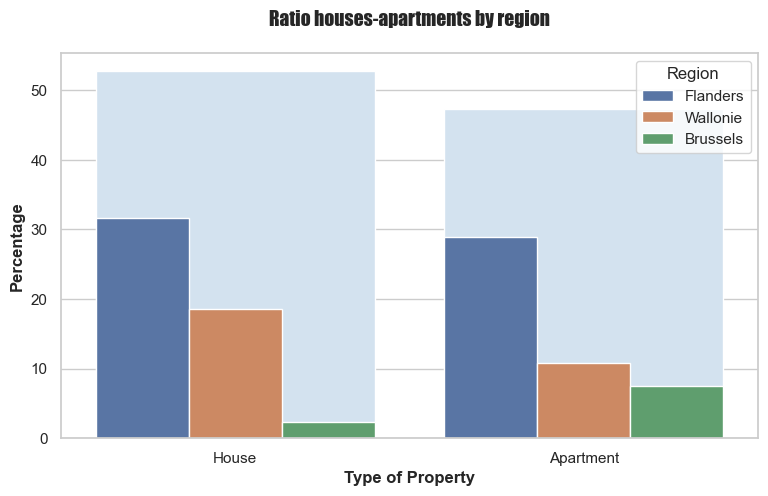

In [44]:
plt.figure(figsize=(9, 5))
sns.set_theme(style="whitegrid", context="notebook")
sns.color_palette("Paired")

g = sns.countplot(data=final_df, x="TypeOfProperty", stat="percent", color="#CFE2F3")

h = sns.countplot(data=final_df, x="TypeOfProperty", hue="Region", stat="percent", legend='auto')

g.set_xlabel("Type of Property", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_ylabel("Percentage", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_title("Ratio houses-apartments by region", y=1.05, fontsize=14, fontfamily='fantasy', fontweight='bold')

plt.show()


### 4.2. The most and less expensive districts in Belgium

Let's compare the districts in Belgium using the median price. We distinguish between houses and apartments.

In [45]:
distict_median_price = final_df.groupby(["TypeOfProperty", "District"], observed=True)["Price"].median()

In [46]:
district_median_price_house = distict_median_price.loc[('House', )]

In [47]:
district_median_price_apartment = distict_median_price.loc[('Apartment', )]


The five districts with the highest median house price.

In [48]:
district_median_price_house.sort_values(ascending=False).head()

District
Brussels           690000.0
Halle-Vilvoorde    494000.0
Brugge             488500.0
Antwerp            466898.0
Nivelles           450000.0
Name: Price, dtype: Float64


The five districts with the lowest median house price.

In [49]:
district_median_price_house.sort_values(ascending=True).head()

District
Mons             195000.0
Charleroi        199000.0
Philippeville    199000.0
Thuin            222500.0
Dinant           250000.0
Name: Price, dtype: Float64


The five districts with the highest median apartement price.

In [50]:
district_median_price_apartment.sort_values(ascending=False).head()

District
Brugge      465000.0
Gent        359000.0
Veurne      350000.0
Brussels    335000.0
Nivelles    330000.0
Name: Price, dtype: Float64


The five districts with the lowest median apartement price.

In [51]:
district_median_price_apartment.sort_values(ascending=True).head()

District
Philippeville    162500.0
Charleroi        199500.0
Mons             219000.0
Dinant           220000.0
Thuin            220000.0
Name: Price, dtype: Float64


### 4.3. Price distribution by Province and Type of Property


Let's see the distribution of the price by province.

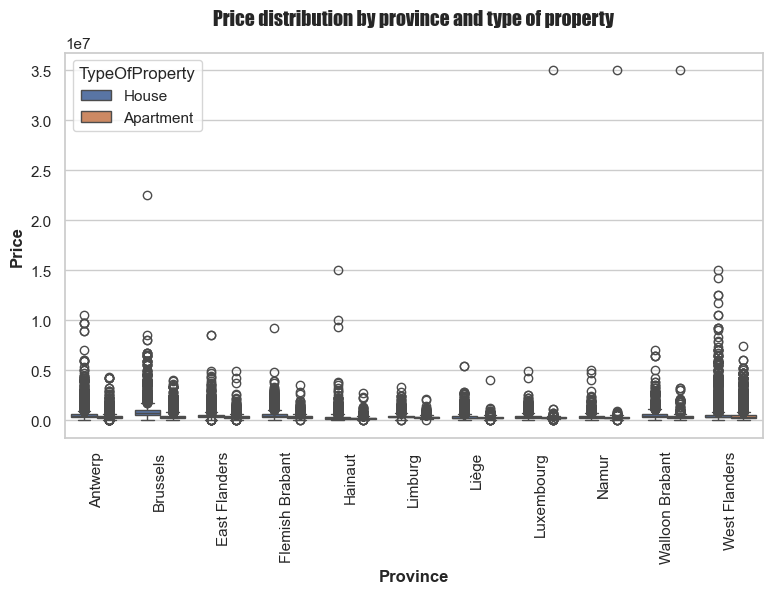

In [52]:
plt.figure(figsize=(9, 5))
sns.set_theme(style="whitegrid", context="notebook")
sns.color_palette("Paired")
g = sns.boxplot(data=final_df,
                x="Province",
                y="Price",
                hue="TypeOfProperty",
                order=sorted(final_df['Province'].unique()))

g.set_xlabel("Province", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_ylabel("Price", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_title("Price distribution by province and type of property", y=1.05, fontsize=14,
            fontfamily='fantasy', fontweight='bold')
plt.xticks(rotation=90)

plt.show()


This is unreadable because of outliers. Let's drop them.

In [53]:
iqr = final_df["Price"].quantile(0.75) - final_df["Price"].quantile(0.25)
lower_threshold = final_df["Price"].quantile(0.25) - (1.5 * iqr)
upper_threshold = final_df["Price"].quantile(0.75) + (1.5 * iqr)


Dropping the outliers.

In [54]:
drop_outliers = np.logical_and(final_df["Price"] > lower_threshold, final_df["Price"] < upper_threshold)
without_outliers_df = final_df[drop_outliers]

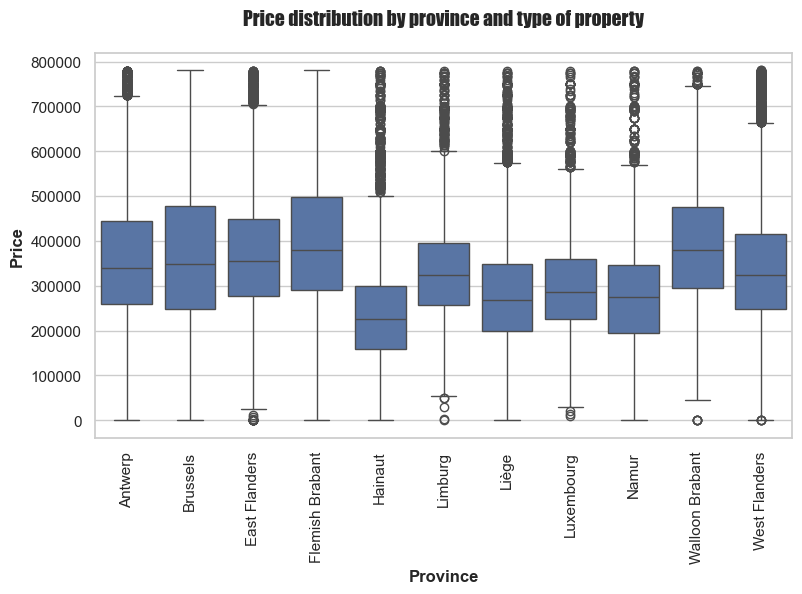

In [55]:
plt.figure(figsize=(9, 5))
sns.set_theme(style="whitegrid", context="notebook")
sns.color_palette("Paired")

g = sns.boxplot(data=without_outliers_df,
                x="Province",
                y="Price",
                order=sorted(without_outliers_df['Province'].unique()))

g.set_xlabel("Province", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_ylabel("Price", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_title("Price distribution by province and type of property", y=1.05, fontsize=14,
            fontfamily='fantasy', fontweight='bold')

plt.xticks(rotation=90)

plt.show()

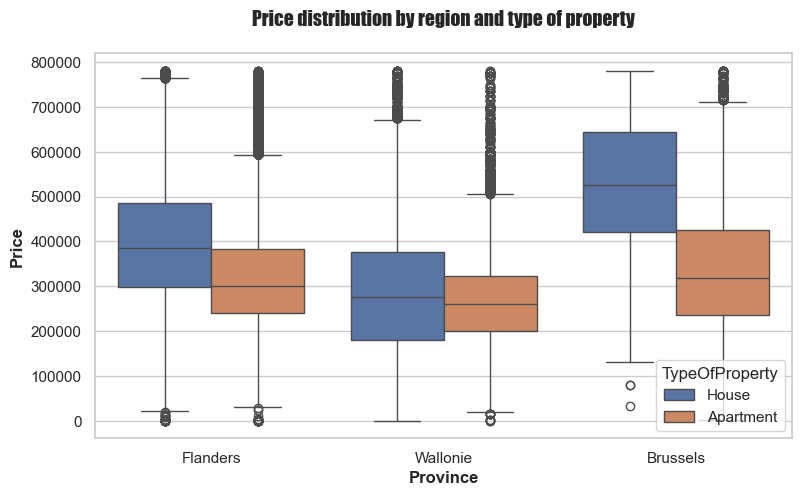

In [56]:
plt.figure(figsize=(9, 5))
sns.set_theme(style="whitegrid", context="notebook")
sns.color_palette("Paired")
g = sns.boxplot(data=without_outliers_df,
                x="Region",
                y="Price",
                hue="TypeOfProperty")

g.set_xlabel("Province", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_ylabel("Price", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_title("Price distribution by region and type of property", y=1.05, fontsize=14,
            fontfamily='fantasy', fontweight='bold')

plt.show()

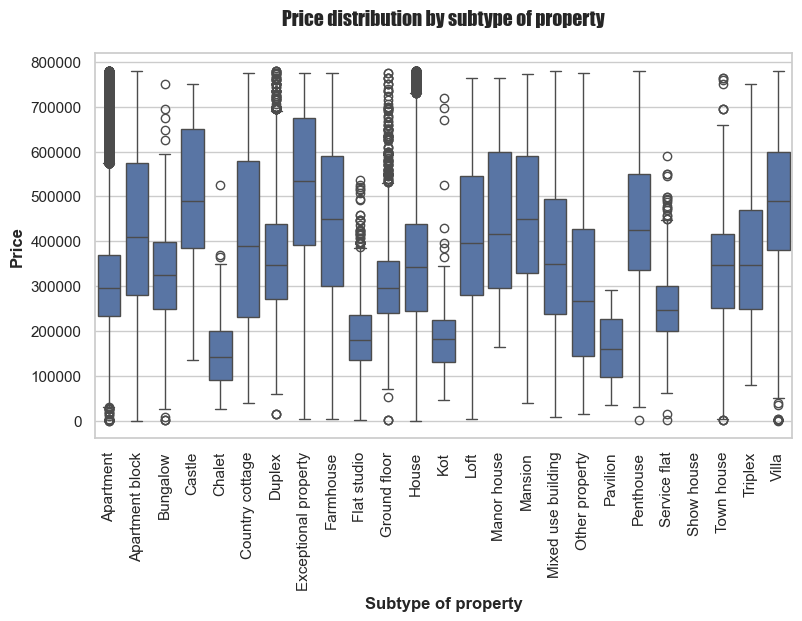

In [57]:
plt.figure(figsize=(9, 5))
sns.set_theme(style="whitegrid", context="notebook")
sns.color_palette("Paired")
g = sns.boxplot(data=without_outliers_df,
            x="SubtypeOfProperty",
            y="Price")

g.set_xlabel("Subtype of property", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_ylabel("Price", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_title("Price distribution by subtype of property", y=1.05, fontsize=14, fontfamily='fantasy', fontweight='bold')

plt.xticks(rotation=90)

plt.show()

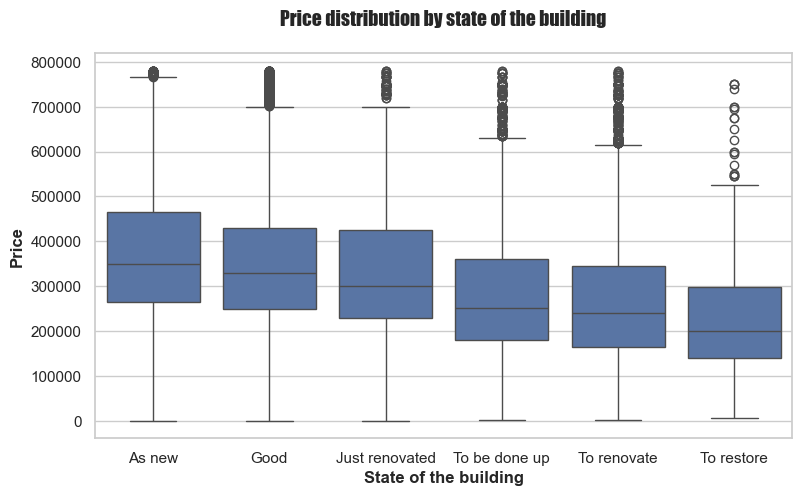

In [58]:
plt.figure(figsize=(9, 5))
sns.set_theme(style="whitegrid", context="notebook")
sns.color_palette("Paired")
g = sns.boxplot(data=without_outliers_df,
                y="Price",
                x="StateOfBuilding",
                #palette=sns.color_palette("Set2")
                #hue="TypeOfProperty",
                #order=sorted(without_outliers_df["StateOfBuilding"].unique())
                )

g.set_xlabel("State of the building", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_ylabel("Price", size=12, fontfamily='sans-serif', fontweight='bold')
g.set_title("Price distribution by state of the building", y=1.05, fontsize=14,
            fontfamily='fantasy', fontweight='bold')

plt.xticks(rotation=0)

plt.show()

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib ipympl

In [ ]:
def price_dist_state(District):
    df = without_outliers_df[without_outliers_df["District"] == District]
    plt.figure(figsize=(9, 5))
    sns.set_theme(style="whitegrid", context="notebook")
    sns.color_palette("Paired")
    g = sns.boxplot(data=df,
                    x="StateOfBuilding",
                    y="Price"
                    )
    
    g.set_xlabel("State of the building", size=12, fontfamily='sans-serif', fontweight='bold')
    g.set_ylabel("Price", size=12, fontfamily='sans-serif', fontweight='bold')
    g.set_title(f"Price distribution in {District} by state of the building", y=1.05, fontsize=14,
                fontfamily='fantasy', fontweight='bold')

    plt.xticks(rotation=0)

In [ ]:
districts_list = sorted(list(without_outliers_df["District"].unique()))

In [ ]:
interact(price_dist_state, District=districts_list)

plt.show()


### 4.4. Correlation between the variables and the Price

Let's examine the correlation between the variables and the price.

In [ ]:
sns.heatmap(final_df[numerical_columns].corr(), annot=False)


## 5. Data Interpretation